In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading and Preprocessing

In [7]:
#load data
df=pd.read_csv(r'C:\Users\Rajakanthan\Documents\Datastorm\credit_card_default_train.csv')

In [8]:
df.head()

,Client_ID,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,...,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,Average Paid,Average Due,NEXT_MONTH_DEFAULT,Total Paid,Total Due,Unnamed: 29
0,A2,1M,M,Graduate,Other,31-45,-1,-1,-1,-1,...,39418,162772,0,538165,149271.8,33474.833333,0,749796,200849,-548947.0
1,A3,1M,F,High School,Other,Less than 30,0,-1,-1,-1,...,43530,80811,942,33666,41029.8,130174.666667,0,356967,781048,424081.0
2,A4,100K,F,High School,Single,31-45,4,3,2,2,...,0,0,0,0,0.0,8040.000000,1,0,48240,48240.0
3,A5,200K,F,Graduate,Single,31-45,2,0,0,0,...,3696,4620,4049,3918,4034.6,96483.333333,1,24028,578900,554872.0
4,A6,1M,F,Graduate,Other,31-45,2,2,0,0,...,16170,17325,16401,17325,17602.2,435555.166667,0,88011,2613331,2525320.0


In [9]:
#check null
df.isnull().sum()

Client_ID                 0
Balance_Limit_V1          0
Gender                    0
EDUCATION_STATUS          0
MARITAL_STATUS            0
AGE                       0
PAY_JULY                  0
PAY_AUG                   0
PAY_SEP                   0
PAY_OCT                   0
PAY_NOV                   0
PAY_DEC                   0
DUE_AMT_JULY              0
DUE_AMT_AUG               0
DUE_AMT_SEP               0
DUE_AMT_OCT               0
DUE_AMT_NOV               0
DUE_AMT_DEC               0
PAID_AMT_JULY             0
PAID_AMT_AUG              0
PAID_AMT_SEP              0
PAID_AMT_OCT              0
PAID_AMT_NOV              0
PAID_AMT_DEC              0
Average Paid              0
Average Due               0
NEXT_MONTH_DEFAULT        0
Total Paid                0
Total Due                 0
Unnamed: 29           23909
dtype: int64

In [10]:
#changing credit limit to numeric
df['balance_unclean']=(df['Balance_Limit_V1'].str.strip().str.findall(r'[0-9]*')).apply(lambda x:''.join(x))
df['balance_thousand']=df['Balance_Limit_V1'].str.strip().str.replace(r'[0-9.]*','')
df['balance_limit_clean']=0
df.loc[df['balance_thousand']=='K','balance_limit_clean']=df['balance_unclean'].astype(int)*1000
df.loc[df['balance_thousand']=='M','balance_limit_clean']=df['balance_unclean'].astype(int)*100000

df=df.drop(['balance_thousand','balance_unclean'],axis=1)

In [11]:
#Change Age to more understandable categories
print(df.AGE.unique())
df['Age_int']=df['AGE']
df['Age_int']=df['Age_int'].str.replace('Less than 30','24')
df['Age_int']=df['Age_int'].str.replace('31-45','38')
df['Age_int']=df['Age_int'].str.replace('46-65','55')
df['Age_int']=df['Age_int'].str.replace('More than 65','75')
df['Age_int']=df['Age_int'].astype(int)

['31-45' 'Less than 30' '46-65' 'More than 65']


In [12]:
#Compute average latness
df['Avg_Late']=df[['PAY_JULY','PAY_AUG','PAY_SEP','PAY_OCT','PAY_NOV','PAY_DEC']].mean(axis=1)
df['Avg_Late'].head()

0   -1.000000
1   -0.666667
2    1.166667
3    0.333333
4    0.666667
Name: Avg_Late, dtype: float64

In [13]:
#compute difference between due and paid amount
df['July_Excess']=df['PAID_AMT_JULY']-df['DUE_AMT_JULY']
df['Aug_Excess']=df['PAID_AMT_AUG']-df['DUE_AMT_AUG']
df['Sep_Excess']=df['PAID_AMT_SEP']-df['DUE_AMT_SEP']
df['Oct_Excess']=df['PAID_AMT_OCT']-df['DUE_AMT_OCT']
df['Nov_Excess']=df['PAID_AMT_NOV']-df['DUE_AMT_NOV']
df['Dec_Excess']=df['PAID_AMT_DEC']-df['DUE_AMT_DEC']


In [14]:
#Extract only neccessary columns
df_clean=df[['Gender','EDUCATION_STATUS','MARITAL_STATUS','balance_limit_clean','Age_int'
             ,'Avg_Late','PAID_AMT_JULY','PAID_AMT_AUG','PAID_AMT_SEP','PAID_AMT_OCT','PAID_AMT_NOV','PAID_AMT_DEC',
            'DUE_AMT_JULY','DUE_AMT_AUG','DUE_AMT_SEP','DUE_AMT_OCT','DUE_AMT_NOV','DUE_AMT_DEC','July_Excess', 'Aug_Excess', 'Sep_Excess',
           'Oct_Excess', 'Nov_Excess', 'Dec_Excess','NEXT_MONTH_DEFAULT']]

# Data Preprocessing

### Getting dummies and splitting test set

In [15]:
#get dummies
df_dummy=pd.get_dummies(df_clean)

In [16]:
df_dummy.head()

,balance_limit_clean,Age_int,Avg_Late,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,DUE_AMT_JULY,...,Nov_Excess,Dec_Excess,NEXT_MONTH_DEFAULT,Gender_F,Gender_M,EDUCATION_STATUS_Graduate,EDUCATION_STATUS_High School,EDUCATION_STATUS_Other,MARITAL_STATUS_Other,MARITAL_STATUS_Single
0,100000,38,-1.000000,3437,6004,39418,162772,0,538165,3248,...,-162772,552147,0,0,1,1,0,0,1,0
1,100000,24,-0.666667,151818,46200,43530,80811,942,33666,353351,...,-79869,-90924,0,1,0,0,1,0,1,0
2,100000,38,1.166667,0,0,0,0,0,0,16681,...,0,0,1,1,0,0,1,0,0,1
3,200000,38,0.333333,3855,3890,3696,4620,4049,3918,90457,...,-96304,-98822,1,1,0,1,0,0,0,1
4,100000,38,0.666667,0,20790,16170,17325,16401,17325,429556,...,-428870,-436574,0,1,0,1,0,0,1,0


In [17]:
#Get dependant and independant variables
y=df_dummy['NEXT_MONTH_DEFAULT']
X=df_dummy.drop('NEXT_MONTH_DEFAULT',axis=1)
variable_y='NEXT_MONTH_DEFAULT'
variable_x=X.columns

In [18]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Feature Selection

In [19]:
#import algorithm from sklearn
from sklearn.feature_selection import SelectKBest

In [20]:
#initiate and fit algorithm
fs = SelectKBest( k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)

In [21]:
# match variables and score to dictionary
variable_score={}
for i in range(len(fs.scores_)):
    variable_score[variable_x[i]]=fs.scores_[i]
    print('%s: %f' % (variable_x[i], fs.scores_[i]))

balance_limit_clean: 84.580600
Age_int: 1.254653
Avg_Late: 1622.968885
PAID_AMT_JULY: 106.827133
PAID_AMT_AUG: 65.105384
PAID_AMT_SEP: 63.627178
PAID_AMT_OCT: 61.895330
PAID_AMT_NOV: 48.470377
PAID_AMT_DEC: 48.743820
DUE_AMT_JULY: 6.527118
DUE_AMT_AUG: 3.190312
DUE_AMT_SEP: 2.633256
DUE_AMT_OCT: 0.575589
DUE_AMT_NOV: 0.175414
DUE_AMT_DEC: 0.169644
July_Excess: 0.100434
Aug_Excess: 0.862333
Sep_Excess: 0.082403
Oct_Excess: 1.319536
Nov_Excess: 2.011770
Dec_Excess: 3.074291
Gender_F: 27.432049
Gender_M: 27.432049
EDUCATION_STATUS_Graduate: 47.158860
EDUCATION_STATUS_High School: 21.661690
EDUCATION_STATUS_Other: 9.680518
MARITAL_STATUS_Other: 18.371041
MARITAL_STATUS_Single: 18.371041


In [22]:
#drop variables with low importance score
for k,v in variable_score.items():
    if v<9:
        x_train=X_train.drop(k,axis=1)
        x_test=X_test.drop(k,axis=1)
    

In [23]:
X.head()

,balance_limit_clean,Age_int,Avg_Late,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,DUE_AMT_JULY,...,Oct_Excess,Nov_Excess,Dec_Excess,Gender_F,Gender_M,EDUCATION_STATUS_Graduate,EDUCATION_STATUS_High School,EDUCATION_STATUS_Other,MARITAL_STATUS_Other,MARITAL_STATUS_Single
0,100000,38,-1.000000,3437,6004,39418,162772,0,538165,3248,...,123354,-162772,552147,0,1,1,0,0,1,0
1,100000,24,-0.666667,151818,46200,43530,80811,942,33666,353351,...,37281,-79869,-90924,1,0,0,1,0,1,0
2,100000,38,1.166667,0,0,0,0,0,0,16681,...,0,0,0,1,0,0,1,0,0,1
3,200000,38,0.333333,3855,3890,3696,4620,4049,3918,90457,...,-92689,-96304,-98822,1,0,1,0,0,0,1
4,100000,38,0.666667,0,20790,16170,17325,16401,17325,429556,...,-418029,-428870,-436574,1,0,1,0,0,1,0


# Fit Random Forest

In [24]:
#import and fit model
from sklearn.ensemble import RandomForestClassifier
  
rf_clf = RandomForestClassifier(n_estimators=800, criterion='gini', max_depth=25, 
                                min_samples_split=8, min_samples_leaf=7, min_weight_fraction_leaf=0.0, 
                                max_features='auto') 
  
rf_clf.fit(X_train, y_train)   

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
#predict for test set
y_pred = rf_clf.predict(X_test)

In [26]:
#Evaluate model
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      3754
           1       0.62      0.32      0.42      1046

    accuracy                           0.81      4800
   macro avg       0.73      0.63      0.65      4800
weighted avg       0.79      0.81      0.78      4800



In [29]:
metrics.accuracy_score(y_test, y_pred)

0.80875

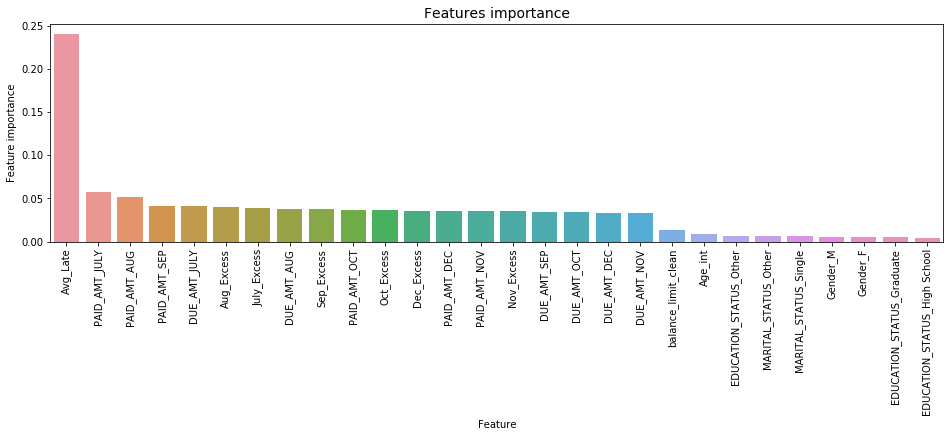

In [27]:
#View feature importance again
tmp = pd.DataFrame({'Feature': variable_x, 'Feature importance': rf_clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (16,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()


# Fit XGBoost

In [30]:
#import library
import xgboost as xgb

In [31]:
#initiate and fit model
model = xgb.XGBClassifier(params={'n_estimators':800,'max_depth':25,'eta':0.15},steps=50
                         )
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'eta': 0.15, 'max_depth': 25, 'n_estimators': 800},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, steps=50, subsample=1, verbosity=1)

In [32]:
#predict
y_pred = model.predict(X_test)

In [33]:
#fit
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.89      3754
           1       0.62      0.33      0.43      1046

    accuracy                           0.81      4800
   macro avg       0.73      0.64      0.66      4800
weighted avg       0.79      0.81      0.79      4800



In [34]:
metrics.accuracy_score(y_test, y_pred)

0.809375

In [35]:
import lightgbm as lgb

In [36]:
lgb_clf=lgb.LGBMClassifier(n_estimators =700)
lgbm=lgb_clf.fit(X_train,y_train)

In [39]:
y_pred=lgbm.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      3754
           1       0.59      0.33      0.42      1046

    accuracy                           0.80      4800
   macro avg       0.71      0.63      0.65      4800
weighted avg       0.78      0.80      0.78      4800



In [40]:
metrics.accuracy_score(y_test, y_pred)

0.80375